In [1]:
import backtrader as bt
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import tushare as ts
pro = ts.pro_api('2f8168a08ce71c9655c5b633b3dc17088bfc6f5a07e629f38f1c3d1f')

In [2]:
tscode='600552.SH'

In [25]:
df=pd.read_feather('D:/project/Quant/Database/autodata.feather')

In [38]:
df=pd.read_feather('D:/project/Quant/Database/600552.feather')

In [39]:
df=df.loc[df['ts_code']==tscode[:-3]]

In [40]:
df

,ts_code,trade_date,close_qfq,open_qfq,high_qfq,low_qfq,vol,pre,std,Smark,...,20SMA,upper_band,lower_band,lowest_low,highest_high,k,d,j,rsv,real
0,600552,2003-04-10,1.47240,1.43299,1.47479,1.41866,11011.49,-0.039290,0.093913,33.783847,...,NaN,NaN,NaN,NaN,NaN,50.000000,50.000000,50.000000,NaN,0.014818
1,600552,2003-04-11,1.47240,1.46881,1.47837,1.45210,6852.77,-0.002148,0.093913,49.087476,...,NaN,NaN,NaN,NaN,NaN,50.000000,50.000000,50.000000,NaN,0.024941
2,600552,2003-04-15,1.51061,1.50464,1.52852,1.49270,17638.17,-0.014062,0.093913,44.048647,...,NaN,NaN,NaN,NaN,NaN,50.000000,50.000000,50.000000,NaN,0.062134
3,600552,2003-04-16,1.46881,1.51658,1.52016,1.46643,13281.41,-0.013466,0.093913,44.299214,...,NaN,NaN,NaN,NaN,NaN,50.000000,50.000000,50.000000,NaN,0.040610
4,600552,2003-04-17,1.49270,1.46881,1.51539,1.46404,10969.39,0.005879,0.093913,52.495930,...,NaN,NaN,NaN,NaN,NaN,50.000000,50.000000,50.000000,NaN,0.096493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,600552,2023-07-25,11.98000,11.88000,12.08000,11.85000,120336.27,-0.001580,0.093913,49.328964,...,11.8225,12.261536,11.383464,11.39,12.32,37.940538,30.495153,52.831307,63.440860,NaN
4603,600552,2023-07-26,11.93000,11.95000,12.09000,11.86000,95300.94,0.008924,0.093913,53.785063,...,11.8565,12.204806,11.508194,11.39,12.17,48.370615,36.453640,72.204564,69.230769,NaN
4604,600552,2023-07-27,11.83000,11.88000,12.00000,11.83000,74152.60,0.002624,0.093913,51.114461,...,11.8695,12.191172,11.547828,11.39,12.09,53.199458,42.035579,75.527214,62.857143,NaN
4605,600552,2023-07-28,11.97000,11.80000,12.02000,11.66000,93236.51,-0.043953,0.093913,31.988769,...,11.8760,12.200404,11.551596,11.39,12.09,63.085353,49.052171,91.151717,82.857143,NaN


In [41]:
df.columns

Index(['ts_code', 'trade_date', 'close_qfq', 'open_qfq', 'high_qfq', 'low_qfq',
       'vol', 'pre', 'std', 'Smark', '1d', 'Bstr', 'fE', 'fstr', 'Bpro',
       '20SMA', 'upper_band', 'lower_band', 'lowest_low', 'highest_high', 'k',
       'd', 'j', 'rsv', 'real'],
      dtype='object')

In [42]:
df['trade_date']=df['trade_date'].astype(str)
df['Datetime']=pd.to_datetime(df['trade_date'])
df['volume']=df['vol']
df['openinterest']=0
df.set_index('Datetime',inplace=True)
df.sort_index(inplace=True,ascending=True)

In [43]:
df=df[['open_qfq', 'high_qfq', 'low_qfq','close_qfq', 'volume', 'openinterest', 'pre','Smark', '1d','Bpro','k','d','j','real','20SMA','upper_band','lower_band']]

In [59]:
class temp(bt.feeds.PandasData):
    lines = ('open', 'high', 'low', 'close', 'volume', 'openinterest', 'pre','Smark','oned','Bmark','real','k','d','j','sma','up','down')
    params = (('open',0), ('high', 1), ('low', 2), ('close', 3), ('volume', 4), ('openinterest', 5), ('pre', 6), ('Smark', 7), ('oned', 8), ('Bmark', 9),
             ('k',10),('d',11),('j',12),('real',13),('sma',14),('up',15),('down',16))
res = temp(dataname=df,fromdate=dt.datetime(2023,1,1),todate=dt.datetime(2023,7,31),timeframe=bt.TimeFrame.Days)

In [54]:
class CustomPandasData(bt.feeds.PandasData):
    lines = ('open', 'high', 'low', 'close', 'volume', 'openinterest', 'pre','Smark','oned','Bmark')
    params = (('open',0), ('high', 1), ('low', 2), ('close', 3), ('volume', 4), ('openinterest', 5), ('pre', 6), ('Smark', 7), ('oned', 8), ('Bmark', 9))
res = CustomPandasData(dataname=df,fromdate=dt.datetime(2023,1,1),todate=dt.datetime(2023,7,31),timeframe=bt.TimeFrame.Days)

买入：
分布大于70且没有触发止损信号：
若第一次买则买入
若要加仓 总收益率必须为正 且只能加仓二次
卖出：
达到目标收益止盈
持有60天内日收益率达不到年化要求
收益率到达止损空间
收益率分布小于40

In [45]:
class st(bt.Strategy):#只能卖后买 可加仓
    def __init__(self):
        self.dataclose = self.data0.close
        self.Bmark = self.data0.Bmark#cdf(0,bpro,std) >40
        self.Smark=self.data0.Smark#cdf(pro,0,std) >60
        self.profit_target = 0.04  # 5%的收益目标
        self.stop_target = -0.1
        self.daily_return_threshold = 0.000386
        self.holding_days = 0  # 持仓天数
        self.total_return = 0  # 总收益率
        self.buy_transaction =pd.DataFrame(columns=['成本','day']) # 买入交易记录
        self.buy_times=-1
        self.stop_mark=False
        self.stop_loss=0.1
        self.log=pd.DataFrame(columns=['日期','行为','价格','信号','价值','操作利润','平均收益','平均日收益'])
        self.sma5=bt.ind.SimpleMovingAverage(self.dataclose,period=5)
        self.order = None
        self.pvalue=self.broker.get_value()
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                buy_price = self.data0.close[0]
                buy_transaction = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'成本': [order.executed.price], 'day': [1]})
                self.buy_transaction = pd.concat([self.buy_transaction, buy_transaction])
                self.buy_times+=1
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['买入'],'价格': [order.executed.price],
                                   '信号':['买入成功'],'价值':[order.executed.value]})
                self.log = pd.concat([self.log, log])
            elif order.issell():
                self.buy_transaction =pd.DataFrame(columns=['成本','day'])
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['卖出'],'价格': [order.executed.price],
                                  '信号':['卖出成功'],'平均收益':[self.total_return],'平均日收益':[self.average_return],
                                  '操作利润':[order.executed.pnl]})
                self.log = pd.concat([self.log, log])
                self.buy_times=-1
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['取消'],'价格': [order.executed.price],
                                   '信号':['操作取消'],'平均收益':[self.total_return],'平均日收益':[self.average_return]})
                self.log = pd.concat([self.log, log])
        # Write down: no pending order
        self.order = None
    def next(self):
        buy_price = self.data0.close[0]  # 获取当前的买入价格
        if self.position and self.Bmark[0] >40:
            current_value=self.broker.get_value()
            pnl=(current_value-self.pvalue)/self.pvalue
            self.total_return=(self.data.close[0]-self.buy_transaction['成本'])/self.buy_transaction['成本']
            self.total_return=self.total_return.mean()
            if not self.buy_transaction.empty and not self.buy_transaction['day'].isnull().all():
                self.average_return = self.total_return / int(self.buy_transaction['day'].mean())
            else:
                self.average_return = np.nan
            if self.total_return>self.profit_target:
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['卖出'],'价格': [self.data.close[0]],'信号':['4%到手'],'平均收益':[self.total_return],'平均日收益':[self.average_return]})
                self.log = pd.concat([self.log, log])
                self.order =self.sell(exectype=bt.Order.Market)
            elif  self.average_return < self.daily_return_threshold and self.buy_transaction['day'].max()>=10:
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['卖出'], '价格': [self.data.close[0]],'信号':['日均较低'],'平均收益':[self.total_return],'平均日收益':[self.average_return]})
                self.log = pd.concat([self.log, log])
                self.order =self.sell(exectype=bt.Order.Market)
            elif self.total_return <=self.stop_target:
                #self.stop_mark=True
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['卖出'], '价格': [self.data.close[0]],'信号':['止损'],'平均收益':[self.total_return],'平均日收益':[self.average_return]})
                self.log = pd.concat([self.log, log])
                self.order =self.sell(exectype=bt.Order.Market)
            elif self.Smark[0]<40 and self.total_return>0:
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['卖出'], '价格': [self.data.close[0]],'信号':['卖出分布'],'平均收益':[self.total_return],'平均日收益':[self.average_return]})
                self.log = pd.concat([self.log, log])
                self.order =self.sell(exectype=bt.Order.Market)
            elif pnl<=-self.stop_loss:
                #self.stop_mark=True
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['卖出'], '价格': [self.data.close[0]],'信号':['本金止损'],'平均收益':[self.total_return],'平均日收益':[self.average_return]})
                self.log = pd.concat([self.log, log])
                self.order =self.sell(exectype=bt.Order.Market)
            if not self.buy_transaction.empty:
                self.buy_transaction['day']+=1
        if self.Bmark[0]<40 and self.stop_mark==False :   
            if self.buy_times==-1:
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['买入'],'价格': [buy_price],'信号':[self.Bmark[0]]})
                self.log = pd.concat([self.log, log])
                self.order = self.buy()
            elif self.buy_times!=-1 and self.total_return>0 and self.buy_times<3:
                log = pd.DataFrame({'日期':[self.data0.datetime.date(0)],'行为': ['买入'],'价格': [buy_price],'信号':[self.Bmark[0]]})
                self.log = pd.concat([self.log, log])
                self.order = self.buy()
    def stop(self):
        self.log.to_excel('log.xlsx',index=None)

In [70]:
class mark(bt.observer.Observer):
    lines = ('markb','marks')#cdf(0,markb,str) cdf(marks,0,str)
    plotinfo = dict(plot=True, subplot=True)
    plotlines = dict(
        markb=dict(markersize=8.0, color='red', fillstyle='full'),
        marks=dict(markersize=8.0, color='blue', fillstyle='full'),
    )
    def next(self):
        self.lines.markb[0]=self._owner.data0.Bmark[0]
        self.lines.marks[0]=self._owner.data0.Smark[0]
class kdj(bt.observer.Observer):
    lines = ('k','d','j')
    plotinfo = dict(plot=True, subplot=True)
    plotlines = dict(
        k=dict( markersize=8.0, color='blue', fillstyle='full'),
        d=dict( markersize=8.0, color='red', fillstyle='full'),
        j=dict( markersize=8.0, color='orange', fillstyle='full'),
    )
    def next(self):
        self.lines.k[0]=self._owner.data0.k[0]
        self.lines.d[0]=self._owner.data0.d[0]
        self.lines.j[0]=self._owner.data0.j[0]
class Buline(bt.observer.Observer):
    lines=('up','down','sma','price')
    plotinfo = dict(plot=True, subplot=True)
    plotlines = dict(
        up=dict( markersize=8.0, color='blue', fillstyle='full'),
        sma=dict( markersize=8.0, color='red', fillstyle='full'),
        down=dict( markersize=8.0, color='green', fillstyle='full'),
        price=dict( markersize=8.0, color='black', fillstyle='full')
    )
    def next(self):
        self.lines.up[0]=self._owner.data0.up[0]
        self.lines.sma[0]=self._owner.data0.sma[0]
        self.lines.down[0]=self._owner.data0.down[0]
        self.lines.price[0]=self._owner.data0.close[0]
class revenue(bt.observer.Observer):
    lines = ('real','oned','pre')
    plotinfo = dict(plot=True, subplot=True)
    plotlines = dict(
        real=dict(markersize=8.0, color='red', fillstyle='full'),
        oned=dict(markersize=8.0, color='blue', fillstyle='full'),
        pre=dict(markersize=8.0, color='green', fillstyle='full'),
    )
    def next(self):
        self.lines.real[0]=self._owner.data0.real[0]
        #self.lines.oned[0]=self._owner.data0.oned[0]
        #self.lines.pre[0]=self._owner.data0.pre[0]

<IPython.core.display.Javascript object>


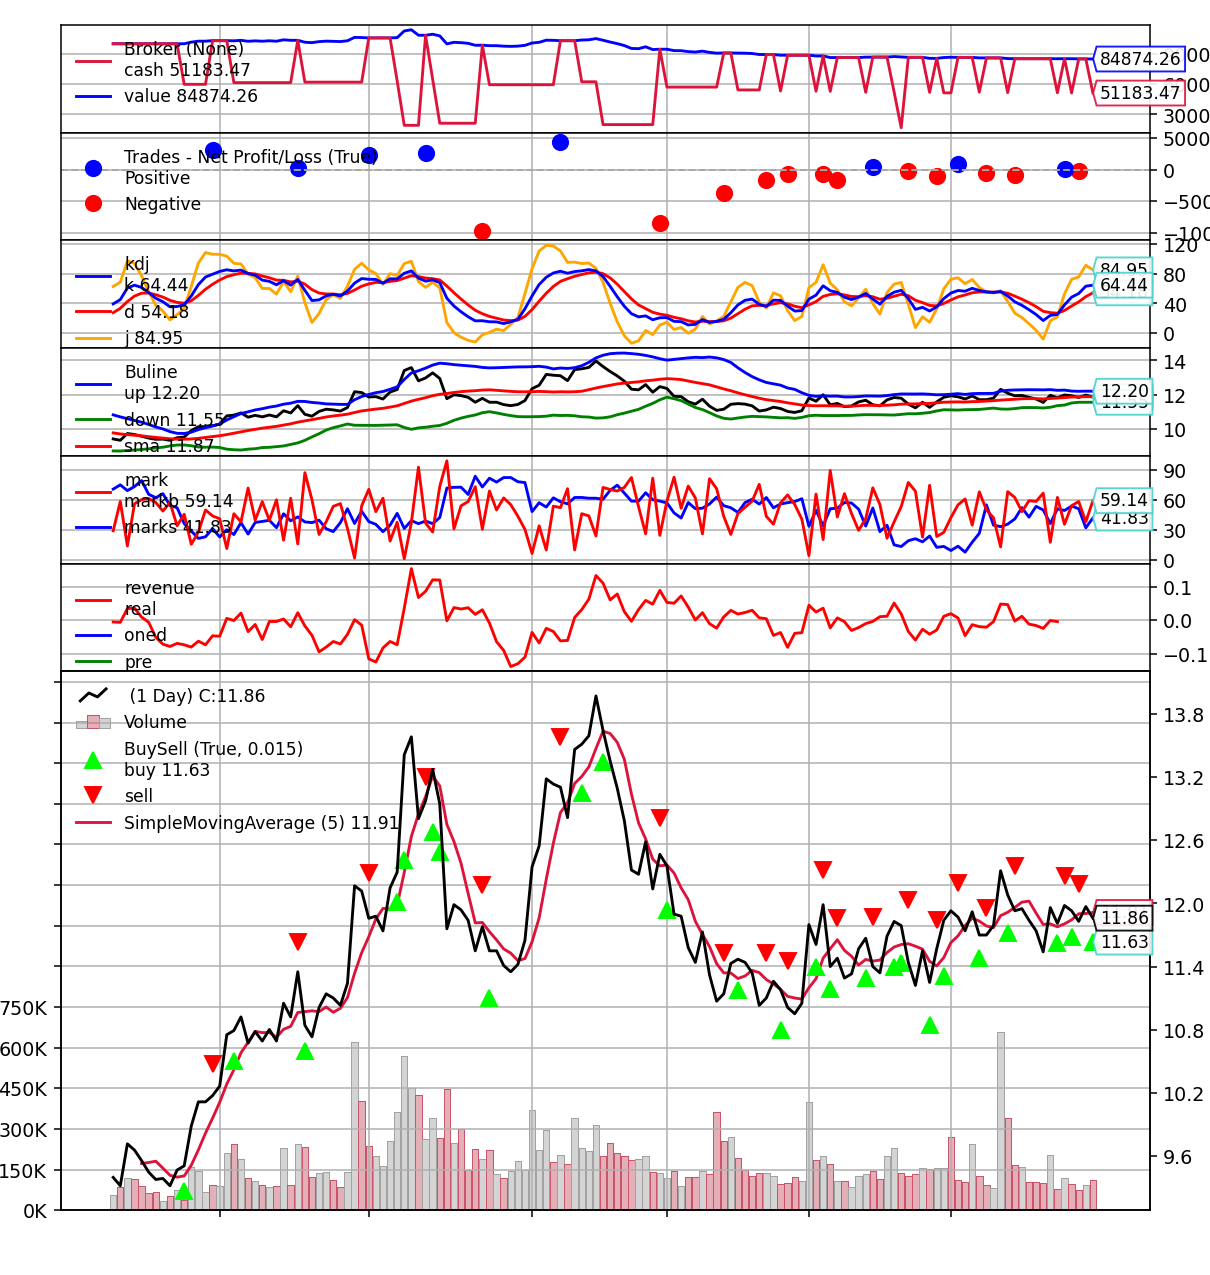

夏普比率 None
最大回撤 25.442166504524238
OrderedDict([(2023, -0.15125738916176346)])


In [71]:
    cerebro=bt.Cerebro()
    cerebro.adddata(res)
    cerebro.addstrategy(st)
    cerebro.addobserver(kdj)
    cerebro.addobserver(Buline)
    cerebro.addobserver(mark)
    cerebro.addobserver(revenue)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio,_name='SharpeRatio')
    cerebro.addanalyzer(bt.analyzers.DrawDown,_name='DrawDown')
    cerebro.addanalyzer(bt.analyzers.AnnualReturn,_name='AnnualReturn')
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.0006)
    cerebro.addsizer(bt.sizers.PercentSizer,percents=40)
    result=cerebro.run()
    cerebro.plot()
    print('夏普比率',result[0].analyzers.SharpeRatio.get_analysis()['sharperatio'])
    print('最大回撤',result[0].analyzers.DrawDown.get_analysis()['max']['drawdown'])
    print(result[0].analyzers.AnnualReturn.get_analysis())